In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import wbgapi as wb
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 


### data processing

In [476]:
def world(x,y,z):
    data = wb.data.DataFrame(x, y, mrv=z) # reading data where year is a column
    data1 = data.T #transposing data: from this we get countries as column
    data2 = wb.data.DataFrame(x, mrv=z) # reading world data for a particular indicator
    return data, data1, data2


In [478]:
country_codes = ['CHN','IND','USA'] #country codes

In [479]:
indicators = ['EN.ATM.CO2E.KT','EN.ATM.GHGT.KT.CE','EG.FEC.RNEW.ZS','EG.USE.COMM.FO.ZS','EN.ATM.PM25.MC.M3'] #indicators list

In [480]:
co2 = ['EN.ATM.CO2E.KT'] # comparing co2 with world
GHG = ['EN.ATM.GHGT.KT.CE'] #comparing green house gases with world
renewable = ['EG.FEC.RNEW.ZS'] #comparing renewable and fossil fuels
fossil = ['EG.USE.COMM.FO.ZS'] #fossil fuels
pollution = ['EN.ATM.PM25.MC.M3'] #plotting pollution in world. # conclusion;

In [483]:
# co2 and green house gasing data.
co2_or,co2_T,co2_w = world(indicators[0],country_codes,20)
GHG_or, GHG_T, GHG_w = world(indicators[1],country_codes,20)


In [482]:
#renewable energy and fossil fuel energy data
ren_or, ren_T,ren_w = world(indicators[2],country_codes,20)
fos_or, fos_T,fos_w = world(indicators[3],country_codes,20)


In [499]:
#pollution data
pol_or, pol_T,pol_w =world(indicators[4],country_codes,30)

---

In [284]:
# processing data to plot Co2 and Green house gases graphs:
def process(x,y):

    da = pd.DataFrame(x.mean()) 
    da.reset_index(level = 0, inplace=True) #resetting index
    da3 = da.rename(columns = {"index":"year", 0: y}) #giving new names to index
    return da3

In [547]:
world_co2 = process(co2_w,"co2") # world data for Co2 emissions
world_GHG = process(GHG_w,"GHG") #world data for Green house gas emission
gt = world_GHG.drop([0,1])


### plotting 

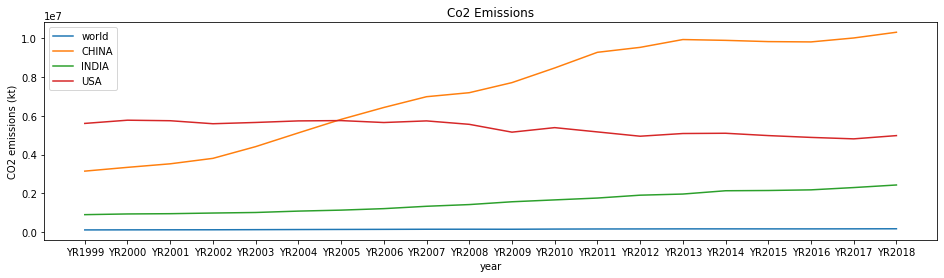

In [541]:
#plotting time-series Co2 graph between countries and the world.
plt.figure(figsize=[16,4])
plt.plot(world_co2['year'],world_co2["co2"])
plt.plot(co2_T)
plt.legend(labels = ["world","CHINA","INDIA","USA"])
plt.xlabel("year")
plt.ylabel("CO2 emissions (kt)")
plt.title("Co2 Emissions")
plt.show()


In [543]:
gttt = GHG_T.rename(index = {"economy":"year"},columns = {"CHN": "CHINA","IND":"INDIA","USA":"USA"}) #renaming transposed data.

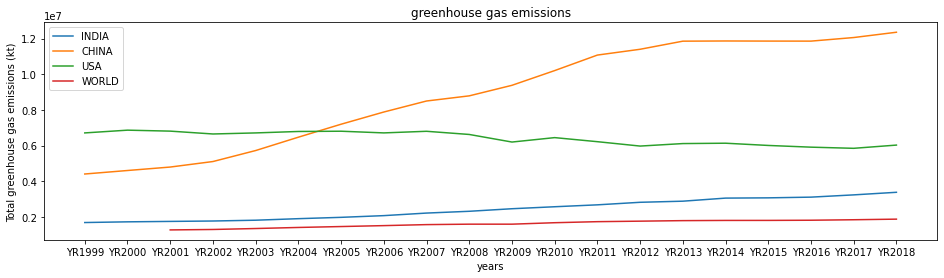

In [546]:
#plotting time-series graph between countries and world
plt.figure(figsize=[16,4])
plt.plot(gttt.index,gttt["INDIA"])
plt.plot(gttt.index,gttt["CHINA"])
plt.plot(gttt.index,gttt["USA"])
plt.plot(gt["year"],gt['GHG'])
plt.legend(labels = ["INDIA","CHINA","USA","WORLD"])
plt.xlabel("years")
plt.ylabel("Total greenhouse gas emissions (kt)")
plt.title("greenhouse gas emissions")
#plt.plot(gttt.index,gttt["INDIA"])
plt.show()

-----

### Fossil fuel and Renewable energy

In [454]:
#processing data for renewable and fossil fuel energy
def energy(x):
    data = x.rename_axis(index = 'countries')
    data1 = data.T
    return data1

In [468]:
renewable_energy= energy(ren_or)
fossil_fuel = energy(fos_or)

In [469]:
#plotting function for renewable and fossil fuel energy
def bar(x,y,z,q):
    
    x.plot(kind='barh', figsize=(8, 8), zorder=2, width=0.85)
    plt.title(y)
    plt.xlabel(q)
    plt.ylabel(z)
    plt.show
    return


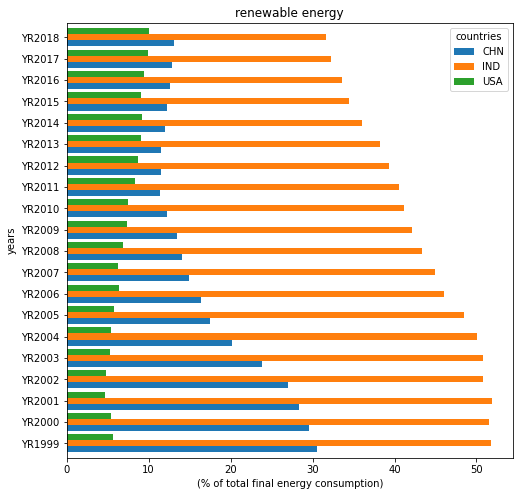

In [528]:
#comparing renewable energy and fossil fuel energy with other countries.
#renewable energy
bar(renweable_energy,"renewable energy","years","(% of total final energy consumption)") #renweable energy

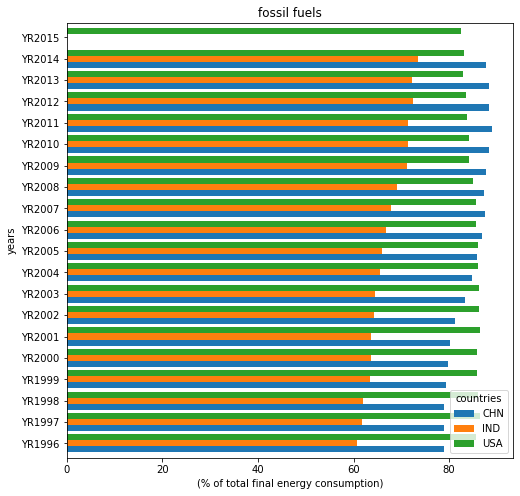

In [471]:
## fossile fuels and renweable energy
bar(fossil_fuel,"fossil fuels","years","(% of total final energy consumption)")

----

### Pollution

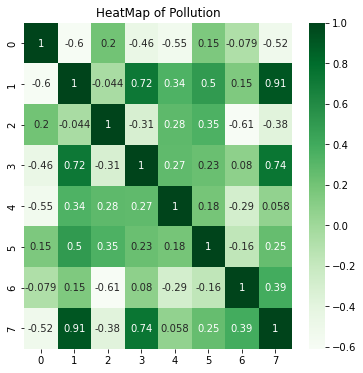

In [527]:
rs = np.random.RandomState(0)
pol_world = pd.DataFrame(rs.rand(8, 8))
corr = pol_world.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title("HeatMap of Pollution")
plt.show()


In [509]:
pp = pol_w.std() #standard deviation on world data to find the range of spread.

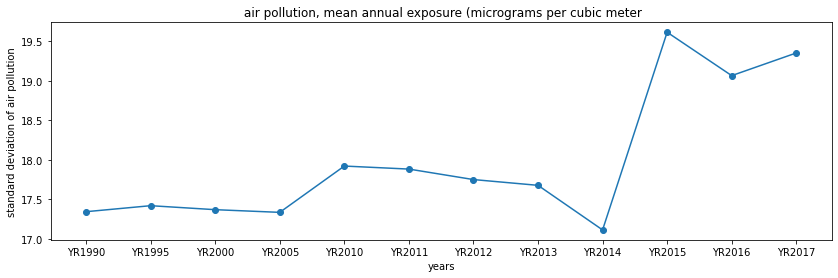

In [519]:
plt.figure(figsize=[14,4])
plt.plot(pp,marker = "o")
plt.title(" air pollution, mean annual exposure (micrograms per cubic meter")
plt.xlabel("years")
plt.ylabel("standard deviation of air pollution")
plt.show()